# XID+PACS Lockman-SWIRE Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [4]:
cat=Table.read('../data/Lockman-SWIRE/PACS/dmu26_XID+PACS_Lockman-SWIRE_cat_20180108.fits')


In [5]:
cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J104834.640+553618.070,162.1443344,55.6050193754,0.54393,1.09414,0.186561,1.43044,2.89156,0.467415,-0.00366082,-0.00967168,0.0111981,0.0169524,nan,1.00199,2000.0,1495.0,0.0,0.0
HELP_J104910.454+554135.336,162.293559631,55.6931488629,0.502299,1.05665,0.158092,1.23655,2.70557,0.32981,-0.00560824,-0.0138214,0.0101176,0.0159154,nan,0.99909,2000.0,2000.0,0.0,0.0
HELP_J104911.099+554218.548,162.29624584,55.7051523559,0.476376,1.03734,0.138765,1.02509,2.26021,0.285571,-0.00889335,-0.0273451,0.00978502,0.0144579,nan,1.00017,2000.0,2000.0,0.0,0.0
HELP_J104919.290+554303.561,162.330374299,55.7176559469,0.534847,1.08949,0.170907,1.3906,2.73541,0.461581,-0.00889335,-0.0273451,0.00978502,0.0144579,nan,0.998968,2000.0,2000.0,0.0,0.0
HELP_J104914.098+554211.057,162.308741513,55.7030714689,0.512162,1.0722,0.161661,1.08362,2.35733,0.310408,-0.00889335,-0.0273451,0.00978502,0.0144579,nan,0.999594,2000.0,2000.0,0.0,0.0
HELP_J104910.874+554227.417,162.295306988,55.7076158319,0.505025,1.03818,0.148464,1.07888,2.34273,0.297664,-0.00889335,-0.0273451,0.00978502,0.0144579,nan,1.00071,2000.0,2000.0,0.0,0.0
HELP_J104914.130+554220.288,162.308873375,55.7056354849,0.508627,1.03655,0.154837,1.00511,2.31797,0.249384,-0.00889335,-0.0273451,0.00978502,0.0144579,nan,0.998642,2000.0,2000.0,0.0,0.0
HELP_J104915.629+554234.317,162.315121515,55.7095323649,0.525378,1.07334,0.16646,1.22282,2.6312,0.348164,-0.00889335,-0.0273451,0.00978502,0.0144579,nan,1.00041,2000.0,2000.0,0.0,0.0


In [6]:
from astropy import units as u
cat['RA'].unit=u.degree
cat['Dec'].unit=u.degree

## Look at Symmetry of PDFs to determine depth level of catalogue

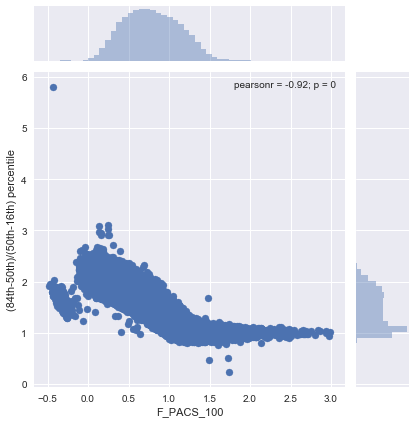

In [7]:
skew=(cat['FErr_PACS_100_u']-cat['F_PACS_100'])/(cat['F_PACS_100']-cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_100']),y=skew, kind='scatter')

In [10]:
10.0**1.4

25.118864315095795

For 100 $\mathrm{\mu m}$ depth is ~ 16mJy

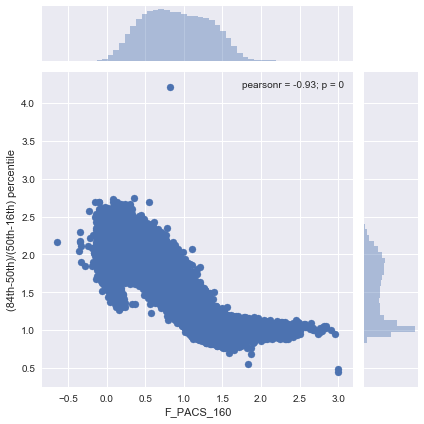

In [9]:
skew=(cat['FErr_PACS_160_u']-cat['F_PACS_160'])/(cat['F_PACS_160']-cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_PACS_160']),y=skew, kind='scatter')

For 160 $\mathrm{\mu m}$ depth is ~ 30mJy

## Add flag to catalogue

In [11]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_100'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_PACS_160'))



In [12]:
ind_100=(cat['F_PACS_100'] < 16)
ind_160=(cat['F_PACS_160'] < 25) 


In [13]:
print(ind_100.sum(),ind_160.sum(),len(cat))

211352 208790 242521


In [14]:
cat['flag_PACS_100'][ind_100]=True
cat['flag_PACS_160'][ind_160]=True


In [26]:
cat.write('../data/Lockman-SWIRE/PACS/dmu26_XID+PACS_Lockman-SWIRE_cat_20180220.fits', format='fits',overwrite=True)


## Check maps

In [16]:
from astropy.io import fits

In [17]:
pacs100_pval=fits.open('../data/Lockman-SWIRE/PACS/dmu26_XID+PACS_PACS_100_Lockman-SWIRE_Bayes_Pval_20180108.fits')
pacs160_pval=fits.open('../data/Lockman-SWIRE/PACS/dmu26_XID+PACS_PACS_160_Lockman-SWIRE_Bayes_Pval_20180108.fits')

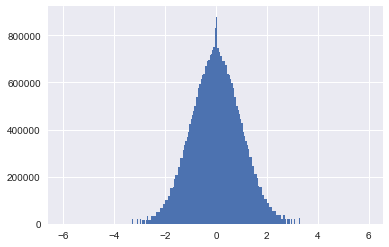

In [18]:
plt.hist(pacs100_pval[1].data[np.isfinite(pacs100_pval[1].data)],bins=np.arange(-6,6,0.05));

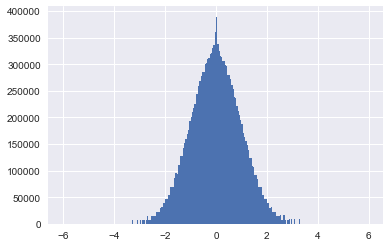

In [19]:
plt.hist(pacs160_pval[1].data[np.isfinite(pacs160_pval[1].data)],bins=np.arange(-6,6,0.05));

## Check cat

In [20]:
old_cat=Table.read('../data/Lockman-SWIRE/PACS/WP4-Lockman-SWIRE-PACSxID24-1.fits.gz')

In [21]:
old_cat['RA'].unit=u.degree
old_cat['Dec'].unit=u.degree

In [22]:
old_cat

XID,RA,Dec,F_PACS_100__A4,F_PACS_100__A5,F_PACS_100__A6,F_PACS_100__A7,F_PACS_100__A8,F_PACS_100__A10,F_PACS_100,Ferr_PACS_100__A4,Ferr_PACS_100__A5,Ferr_PACS_100__A6,Ferr_PACS_100__A7,Ferr_PACS_100__A8,Ferr_PACS_100__A10,Ferr_PACS_100,F_PACS_100__SKY,F_PACS_160__A4,F_PACS_160__A5,F_PACS_160__A6,F_PACS_160__A7,F_PACS_160__A8,F_PACS_160__A10,F_PACS_160,Ferr_PACS_160__A4,Ferr_PACS_160__A5,Ferr_PACS_160__A6,Ferr_PACS_160__A7,Ferr_PACS_160__A8,Ferr_PACS_160__A10,Ferr_PACS_160,F_PACS_160__SKY,HELP_ID
,deg,deg,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy / pix,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy / pix,
int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str21
55094,157.885,57.7937,9.02092,7.14568,3.51946,5.56078,9.21921,10.6735,15.3718,10.6618,9.94076,10.0109,10.3513,11.0116,12.538,8.4924,0.0,18.8137,17.3805,18.6944,19.1206,21.4507,26.9378,30.5159,17.2468,14.7891,13.8573,13.1697,12.8206,13.502,10.1531,0.0,LSW-PACSxID24-1-00001
13525,157.893,57.777,3.16807,1.29192,4.66216,10.553,10.2446,9.68735,-6.45385,10.4702,9.72145,9.76424,10.1188,10.7726,12.307,8.27506,0.0,-27.7287,-25.0592,-26.4625,-23.1959,-19.3949,-16.4075,4.85446,16.9216,14.4654,13.7654,13.148,12.846,13.4793,10.0465,0.0,LSW-PACSxID24-1-00002
64347,157.895,57.8191,5.75273,8.18586,7.89076,8.89645,15.6745,28.2692,-9.97668,10.4168,9.71548,9.7807,10.1205,10.7638,12.289,8.39396,0.0,11.4818,6.94,0.829214,0.469277,2.41869,11.1176,3.71242,18.1226,15.4752,14.4701,13.661,13.3267,14.127,10.4779,0.0,LSW-PACSxID24-1-00003
16311,157.897,57.7919,4.53647,5.47682,3.28902,-1.72945,-9.71383,-14.3485,8.60216,10.553,9.75611,9.762,10.1237,10.807,12.3256,8.41116,0.0,-32.4522,-29.2303,-25.4401,-22.1462,-19.3616,-20.5102,-9.00424,17.3661,14.7956,13.8102,13.0808,12.7386,13.4396,10.1985,0.0,LSW-PACSxID24-1-00004
67429,157.908,57.8451,12.388,10.0876,3.04423,-3.58092,-6.2408,-7.42368,2.34456,10.4326,9.69725,9.75909,10.0934,10.7331,12.2641,8.40828,0.0,7.22843,10.2639,14.6826,21.2462,24.8583,32.1182,20.1176,17.0768,14.6741,13.7732,13.1392,12.7924,13.4814,10.1474,0.0,LSW-PACSxID24-1-00005
60595,157.915,57.8387,11.2991,14.4838,19.1909,20.7678,22.9785,35.1171,2.71202,10.2557,9.54668,9.64508,10.0095,10.648,12.1959,8.27572,0.0,27.3863,30.3148,31.4225,33.8233,35.3651,39.2798,11.3299,17.1716,14.6221,13.7089,13.0571,12.7255,13.4304,10.1575,0.0,LSW-PACSxID24-1-00006
39814,157.919,57.7128,7.74599,9.4915,13.4131,19.6603,26.5667,35.3264,8.49927,10.4554,9.67334,9.72992,10.0814,10.7111,12.2692,8.34741,0.0,-3.93177,-4.33487,-4.5847,-3.40892,-5.17015,-12.4079,-11.8417,18.3161,15.536,14.4857,13.6785,13.3528,13.9858,10.5209,0.0,LSW-PACSxID24-1-00007
3368,157.919,57.8943,9.95576,11.8801,10.5108,6.91875,-1.64932,0.108546,-11.3414,10.653,9.78131,9.80894,10.2658,10.9633,12.4521,8.4529,0.0,5.66607,7.7462,9.67202,10.7888,11.5618,20.3513,49.2499,17.9168,15.2148,14.2687,13.5493,13.2392,13.9143,10.4717,0.0,LSW-PACSxID24-1-00008


In [23]:
from astropy.coordinates import SkyCoord
from astropy import units as u
c = SkyCoord(ra=cat['RA'], dec=cat['Dec'])  
catalog = SkyCoord(ra=old_cat['RA'], dec=old_cat['Dec'])  
idx, d2d, d3d = c.match_to_catalog_sky(catalog)  

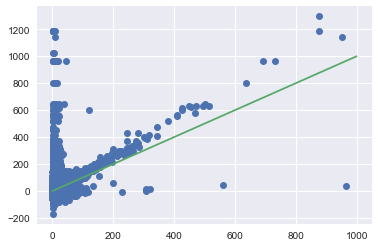

In [24]:
plt.plot(cat['F_PACS_100'],old_cat['F_PACS_100'][idx],'o' )
plt.plot(np.arange(0,1000),np.arange(0,1000))

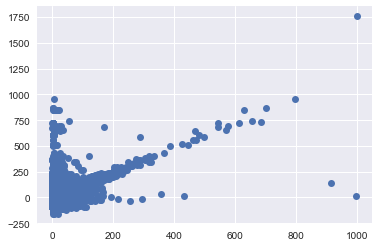

In [25]:
plt.plot(cat['F_PACS_160'],old_cat['F_PACS_160'][idx],'o' )